# Integración II

## Odeint

Hay diversos métodos, más o menos precisos y que funcionan para diversos sistemas. Scipy trae un integrador bastante bueno llamado ["odeint"](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) (no teman a la documentación).

El odeint necesita que le digamos como calcular la derivada en cada punto (tenemos que darle el campo vector), las condiciones iniciales y los tiempos donde queremos que integre.

Rehagamos el ejercicio de antes:

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def campo_vector(z, t):
    x = z[0]
    y = z[1]
    dxdt = 4*x+2*y
    dydt = -17*x-5*y
    return [dxdt, dydt]    

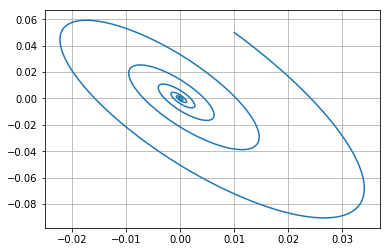

In [3]:
dt = 0.001
t = np.arange(0, 10, dt)
xi = 0.01
yi = 0.05
zi = [xi, yi]
sol = odeint(campo_vector, zi, t)
xt = sol[:, 0]
yt = sol[:, 1]
plt.plot(xt, yt)
plt.grid ()
plt.show ()

## Varias condiciones iniciales, flechas de flujo

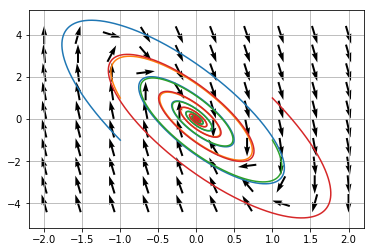

In [24]:
Xi = np.linspace(-1, 1, 2)
Yi = np.linspace(-1, 1, 2)
for xi in Xi:
    for yi in Yi:
        zi = [xi, yi]
        sol = odeint(campo_vector, zi, t)
        xt = sol[:, 0]
        yt = sol[:, 1]
        plt.plot(xt, yt)

# Con esto defino las posiciones donde van a arrancar las flechas.
X = np.linspace(-2, 2, 10)
Y = np.linspace(-4, 4, 10)
XX, YY = np.meshgrid(X, Y)
# Con esto sus direcciones. Que son las dadas por el campo vector.
DX, DY = campo_vector([XX, YY], t)
M = (np.hypot(DX, DY))

# Esto para normalizar el tamaño de las flechas.
M[M == 0] = 1.
DX /= M 
DY /= M 

# plt.quiver () me plotea las flechas en las coordenadas XX YY y con la dirección y largo DX DY.
plt.quiver(XX, YY, DX, DY, pivot='mid')
plt.grid ()
plt.show ()

### Rehagan el ejercicio 6e con el integrador odeint!

### Ecuaciones con parámetros, como pasarle argumentos al odeint

Una de las cosas que nos suele interesar es analizar como cambian los flujos cuando cambiamos algún parámetro. Para eso está bueno tener una función definida y pasarle el parámetro que queremos ir moviendo como un argumento. Esto se puede hacer con el odeint, agregando un argumento cuando lo llamamos. Veamos el ejemplo del switch bioquímico:

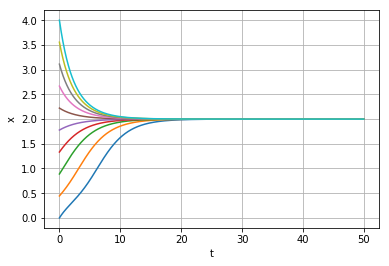

In [34]:
def f(x, t, r, s):
    dxdt = s - r*x + x**2/(1+x**2)
    return dxdt

tmax = 50.
dt = 1./100
t = np.linspace(0, tmax, int(tmax/dt))
r = 0.5
s = 0.2
Xi = np.linspace(0, 4, 10)
for xi in Xi:
    x = odeint(f, xi, t, args=(r, s))
    plt.plot(t, x)
plt.xlabel('t')
plt.ylabel('x')

plt.grid ()
plt.show ()

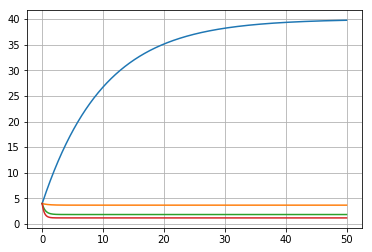

In [37]:
rs = np.linspace(0.1, 3, 4)
xi = 4
for r in rs:
    x = odeint(f, xi, t, args=(r, s))
    plt.plot(t, x)

plt.grid()
plt.show ()

### (Extra) Cómo pasarle al odeint un argumento que varía en el tiempo
A veces las ecuaciones diferenciales tienen parámetros que varían en el tiempo. Por ejemplo, en el ejercicio del switch vimos qué pasaba cuando aumentabamos el s y luego lo disminuiamos para distintos valores de r.

Una forma de hacer esto con el odeint es la siguiente:

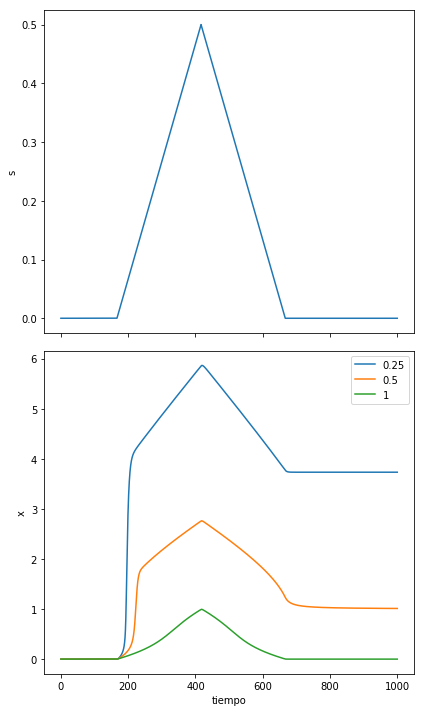

In [94]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy import signal

def f(x, t, r):
    dxdt = sfunc(t) - r*x + x**2/(1+x**2)
    return dxdt

tmax = 1000.
dt = 1./100
t = np.linspace(0, tmax, int(tmax/dt))

rs = [0.25, .5, 1]
# Definimos una señal triangular para s (prende y apaga)
st = np.zeros_like(t)
st_ini = signal.triang(2*len(t)//4)/2
st[len(st)//6:len(st)//6+len(st_ini)] = st_ini
# Definimos una función que interpola linealmente a s
sfunc = interp1d(t, st, fill_value='extrapolate')

fig, ax = plt.subplots(2, sharex=True, figsize=(6, 10))
ax[0].plot(t, sfunc(t))
ax[0].set_ylabel('s')

nplot = 0
for r in rs:
    nplot += 1
    xi = 0
    x = odeint(f, xi, t, args=(r, ))
    ax[1].plot(t, x, label='{}'.format(r))
ax[1].legend()
ax[1].set_ylabel('x')
ax[1].set_xlabel('tiempo')
fig.tight_layout()